# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET

In [2]:
# LOADING DATASET FROM DESKTOP

df=pd.read_csv(r'C:\Users\rohit\Desktop\TNBC (1).csv')
df.head()

,Age,HPE,Stage,Tumor Size,Surgery,surgerylevel,relapse_time,relapse,Chemo given initially,Treatment given on relapse,Outcome_time,Survival,event
0,65,AGCT,Ia,8x9,Complete Surgery,1,12.0,1,nil,4 cycles CDDP +CTx chemo,150.0,Alive,0
1,48,AGCT,Ic,NaN,Complete Surgery,1,0.0,0,6 x CDDP +Ctx,nil,148.0,Alive,0
2,52,AGCT,Ia,NaN,Incomplete Surgery,2,24.0,1,nil,6xCDDP+ Ctx ; 6xCDDP + Etop,140.0,Alive,0
3,42,AGCT,Ic,25 cm,Incomplete Surgery,2,11.0,1,6 x CDDP +Ctx,6xEP,133.0,Alive,0
4,25,AGCT,IIIc,NaN,Incomplete Surgery,2,24.0,1,6xCDDP+ Ctx ; 6xCDDP + Etop,PEB ;VAC;CDDP +Ctx each 6 cycles,132.0,Alive,0


# DESCRIPTIVE ANALYTICS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         34 non-null     int64  
 1   HPE                         34 non-null     object 
 2   Stage                       34 non-null     object 
 3   Tumor Size                  24 non-null     object 
 4   Surgery                     34 non-null     object 
 5   surgerylevel                34 non-null     int64  
 6   relapse_time                30 non-null     float64
 7   relapse                     34 non-null     int64  
 8   Chemo given initially       33 non-null     object 
 9   Treatment given on relapse  34 non-null     object 
 10  Outcome_time                33 non-null     float64
 11  Survival                    34 non-null     object 
 12  event                       34 non-null     int64  
dtypes: float64(2), int64(4), object(7)
me

In [4]:
df.describe()

,Age,surgerylevel,relapse_time,relapse,Outcome_time,event
count,34.000000,34.000000,30.000000,34.000000,33.000000,34.000000
mean,41.823529,1.970588,18.666667,0.705882,66.030303,0.441176
std,14.876197,0.717119,23.287311,0.462497,49.649072,0.503995
min,14.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,28.500000,1.250000,0.000000,0.000000,23.000000,0.000000
50%,43.000000,2.000000,12.000000,1.000000,72.000000,0.000000
75%,54.750000,2.000000,24.000000,1.000000,98.000000,1.000000
max,67.000000,3.000000,89.000000,1.000000,150.000000,1.000000


In [5]:
df.isnull().sum()

Age                            0
HPE                            0
Stage                          0
Tumor Size                    10
Surgery                        0
surgerylevel                   0
relapse_time                   4
relapse                        0
Chemo given initially          1
Treatment given on relapse     0
Outcome_time                   1
Survival                       0
event                          0
dtype: int64

In [6]:
for col in df.columns:
    print(col,df[str(col)].unique())
    print('================================================================================================================')

Age [65 48 52 42 25 50 35 44 19 45 40 23 38 28 57 58 60 67 55 18 21 26 14 56
 30 54]
HPE ['AGCT' 'SCST' 'androgen secreting tumor' 'JGCT']
Stage ['Ia ' 'Ic ' 'IIIc ' 'IIIa ' 'IIa ' 'IV ' 'IIC ']
Tumor Size ['8x9' nan '25 cm' '9 cm' '10cm' '>10cm' '9x9cm' '7x9 cm' '11x12 cm'
 '10.6x11.94 cm' '7cm' '15x10 cm' '8x8 cm' '10 cm' '10x10' '13x13' '6 cm'
 '20cm' '18x20 cm' '8.1x8.1 cm' '12 cm' '9x 10cm']
Surgery ['Complete Surgery' 'Incomplete Surgery' 'FSO' 'Optimal surgery']
surgerylevel [1 2 3]
relapse_time [12.  0. 24. 11. 89. 26. 76. 13. 23. 75. 30. 25.  7. nan 16.]
relapse [1 0]
Chemo given initially ['nil' '6 x CDDP +Ctx' ' 6xCDDP+ Ctx ; 6xCDDP + Etop' nan
 '6xCDDP+ VCR ; 6xCDDP +VP16 ;oral endoxan' 'CDDP + CTx 6 cycles alone'
 'PEB 4 cycles ' 'CDDP+Bleo +Vinb 3 cycles' '6xEP' 'BEP'
 '6xCDDP+ Ctx ; 6xCDDP + Etop']
Treatment given on relapse [' 4 cycles CDDP +CTx chemo' 'nil' ' 6xCDDP+ Ctx ; 6xCDDP + Etop' '6xEP'
 'PEB ;VAC;CDDP +Ctx  each 6 cycles' '6 x CDDP +Ctx'
 ' 6xCDDP+ Ctx ; 6xCDD

In [7]:
for col in df.columns:
    print(col,df[str(col)].value_counts(normalize=True)*100)
    print('================================================================================================================')

Age 42    8.823529
40    5.882353
55    5.882353
48    5.882353
44    5.882353
60    5.882353
21    5.882353
23    2.941176
18    2.941176
58    2.941176
57    2.941176
56    2.941176
14    2.941176
54    2.941176
52    2.941176
50    2.941176
45    2.941176
25    2.941176
19    2.941176
67    2.941176
38    2.941176
35    2.941176
30    2.941176
28    2.941176
26    2.941176
65    2.941176
Name: Age, dtype: float64
HPE AGCT                        79.411765
SCST                        11.764706
JGCT                         5.882353
androgen secreting tumor     2.941176
Name: HPE, dtype: float64
Stage IIIc     32.352941
Ia       26.470588
Ic       20.588235
IV        8.823529
IIIa      5.882353
IIa       2.941176
IIC       2.941176
Name: Stage, dtype: float64
Tumor Size 10 cm            12.500000
9 cm              8.333333
8x8 cm            4.166667
18x20 cm          4.166667
15x10 cm          4.166667
8x9               4.166667
9x9cm             4.166667
10.6x11.94 cm     4.166667
6 cm

# DATA PREPROCESSING

In [8]:
df[['First','Last']] = df['Tumor Size'].str.split("x",expand=True)
df['First'].unique()
df['Last'].unique()

array(['9', nan, None, '9cm', '9 cm', '12 cm', '11.94 cm', '10 cm',
       '8 cm', '10', '13', '20 cm', '8.1 cm', ' 10cm'], dtype=object)

In [9]:
#REPLACING THE WORD WITH SPACES

df['First'] = df['First'].str.replace("cm","")
df['First'] = df['First'].str.replace(">","")
df['First'] = df['First'].str.replace(" ","")
df['First'] = df['First'].fillna(0)
df['First'].astype('float')

0      8.0
1      0.0
2      0.0
3     25.0
4      0.0
5      0.0
6      9.0
7      0.0
8      0.0
9     10.0
10    10.0
11     9.0
12     7.0
13    11.0
14    10.6
15     7.0
16    15.0
17     8.0
18     0.0
19    10.0
20    10.0
21    13.0
22     6.0
23     9.0
24    10.0
25    20.0
26    10.0
27    18.0
28     8.1
29     0.0
30     0.0
31    12.0
32     0.0
33     9.0
Name: First, dtype: float64

In [10]:
# REPLACING THE WORD WITH SPACE

df['Last'] = df['Last'].str.replace("cm","")
df['Last'] = df['Last'].str.replace(">","")
df['Last'] = df['Last'].str.replace(" ","")
df['Last'] = df['Last'].fillna(0)
df['Last'].astype('float')
df['Last'].unique()

array(['9', 0, '12', '11.94', '10', '8', '13', '20', '8.1'], dtype=object)

In [11]:
# RENAME THE COLUMNS NAME 

df.rename(columns={'First':'Tumor_Size_1'},inplace=True)
df.rename(columns={'Last':'Tumor_Size_2'},inplace=True)       

In [12]:
# DROP THE TUMOR COLUMS 

df.drop('Tumor Size',axis=1).head()

,Age,HPE,Stage,Surgery,surgerylevel,relapse_time,relapse,Chemo given initially,Treatment given on relapse,Outcome_time,Survival,event,Tumor_Size_1,Tumor_Size_2
0,65,AGCT,Ia,Complete Surgery,1,12.0,1,nil,4 cycles CDDP +CTx chemo,150.0,Alive,0,8,9
1,48,AGCT,Ic,Complete Surgery,1,0.0,0,6 x CDDP +Ctx,nil,148.0,Alive,0,0,0
2,52,AGCT,Ia,Incomplete Surgery,2,24.0,1,nil,6xCDDP+ Ctx ; 6xCDDP + Etop,140.0,Alive,0,0,0
3,42,AGCT,Ic,Incomplete Surgery,2,11.0,1,6 x CDDP +Ctx,6xEP,133.0,Alive,0,25,0
4,25,AGCT,IIIc,Incomplete Surgery,2,24.0,1,6xCDDP+ Ctx ; 6xCDDP + Etop,PEB ;VAC;CDDP +Ctx each 6 cycles,132.0,Alive,0,0,0


In [13]:
# FILLING THE VALUE WITH CONSTANT VALUE 

df['relapse_time'] = df['relapse_time'].fillna(0)
df['Outcome_time'] = df['Outcome_time'].fillna(0)
df[ 'Chemo given initially'] = df['Chemo given initially'].fillna(0)

In [14]:
df.drop('Tumor Size',axis=1,inplace=True)

In [15]:
df.isnull().sum()

Age                           0
HPE                           0
Stage                         0
Surgery                       0
surgerylevel                  0
relapse_time                  0
relapse                       0
Chemo given initially         0
Treatment given on relapse    0
Outcome_time                  0
Survival                      0
event                         0
Tumor_Size_1                  0
Tumor_Size_2                  0
dtype: int64

# DATA LABELING 

In [16]:
df['Treatment given on relapse']=df[ 'Treatment given on relapse'].replace(" ","")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df[ 'Treatment given on relapse']=label_encoder.fit_transform(df[ 'Treatment given on relapse'])
df[ 'Treatment given on relapse'].unique()

array([ 1, 12,  2,  7, 10,  5,  3,  8,  0,  6, 11,  4,  9])

In [17]:
df[ 'Chemo given initially']=df[ 'Chemo given initially'].replace(" ","")
label_encoder = preprocessing.LabelEncoder()
df[ 'Chemo given initially']=label_encoder.fit_transform(df[ 'Treatment given on relapse'])
df[ 'Chemo given initially'].unique()

array([ 1, 12,  2,  7, 10,  5,  3,  8,  0,  6, 11,  4,  9], dtype=int64)

In [18]:
df.rename(columns={ 'Chemo given initially':'Chemo'},inplace=True)
df.rename(columns={ 'Treatment given on relapse':'Treatment'},inplace=True)       

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Surgery']=le.fit_transform(df['Surgery'])
df['HPE']=le.fit_transform(df['HPE'])
df['Stage']=le.fit_transform(df['Stage'])
df['Survival ']=le.fit_transform(df['Survival '])

In [20]:
df['Tumor_Size_1']=df['Tumor_Size_1'].astype('float')
df['Tumor_Size_2']=df['Tumor_Size_2'].astype('float')
df['relapse_time']=df['relapse_time'].astype('int')
df['Outcome_time']=df['Outcome_time'].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           34 non-null     int64  
 1   HPE           34 non-null     int32  
 2   Stage         34 non-null     int32  
 3   Surgery       34 non-null     int32  
 4   surgerylevel  34 non-null     int64  
 5   relapse_time  34 non-null     int32  
 6   relapse       34 non-null     int64  
 7   Chemo         34 non-null     int64  
 8   Treatment     34 non-null     int32  
 9   Outcome_time  34 non-null     int32  
 10  Survival      34 non-null     int32  
 11  event         34 non-null     int64  
 12  Tumor_Size_1  34 non-null     float64
 13  Tumor_Size_2  34 non-null     float64
dtypes: float64(2), int32(7), int64(5)
memory usage: 2.9 KB


In [22]:
for col in df.columns:
    print(col,df[str(col)].unique())
    print('==================================================================================================================')

Age [65 48 52 42 25 50 35 44 19 45 40 23 38 28 57 58 60 67 55 18 21 26 14 56
 30 54]
HPE [0 2 3 1]
Stage [5 6 2 1 3 4 0]
Surgery [0 2 1 3]
surgerylevel [1 2 3]
relapse_time [12  0 24 11 89 26 76 13 23 75 30 25  7 16]
relapse [1 0]
Chemo [ 1 12  2  7 10  5  3  8  0  6 11  4  9]
Treatment [ 1 12  2  7 10  5  3  8  0  6 11  4  9]
Outcome_time [150 148 140 133 132 126 123 120  98  90  87  85  83  75  72  61  43  35
  33  27  26  23  14   8   7   5   3   2  16   0  28]
Survival  [0 1 2]
event [0 1]
Tumor_Size_1 [ 8.   0.  25.   9.  10.   7.  11.  10.6 15.  13.   6.  20.  18.   8.1
 12. ]
Tumor_Size_2 [ 9.    0.   12.   11.94 10.    8.   13.   20.    8.1 ]


# DAIGNOSIS ANALYSIS

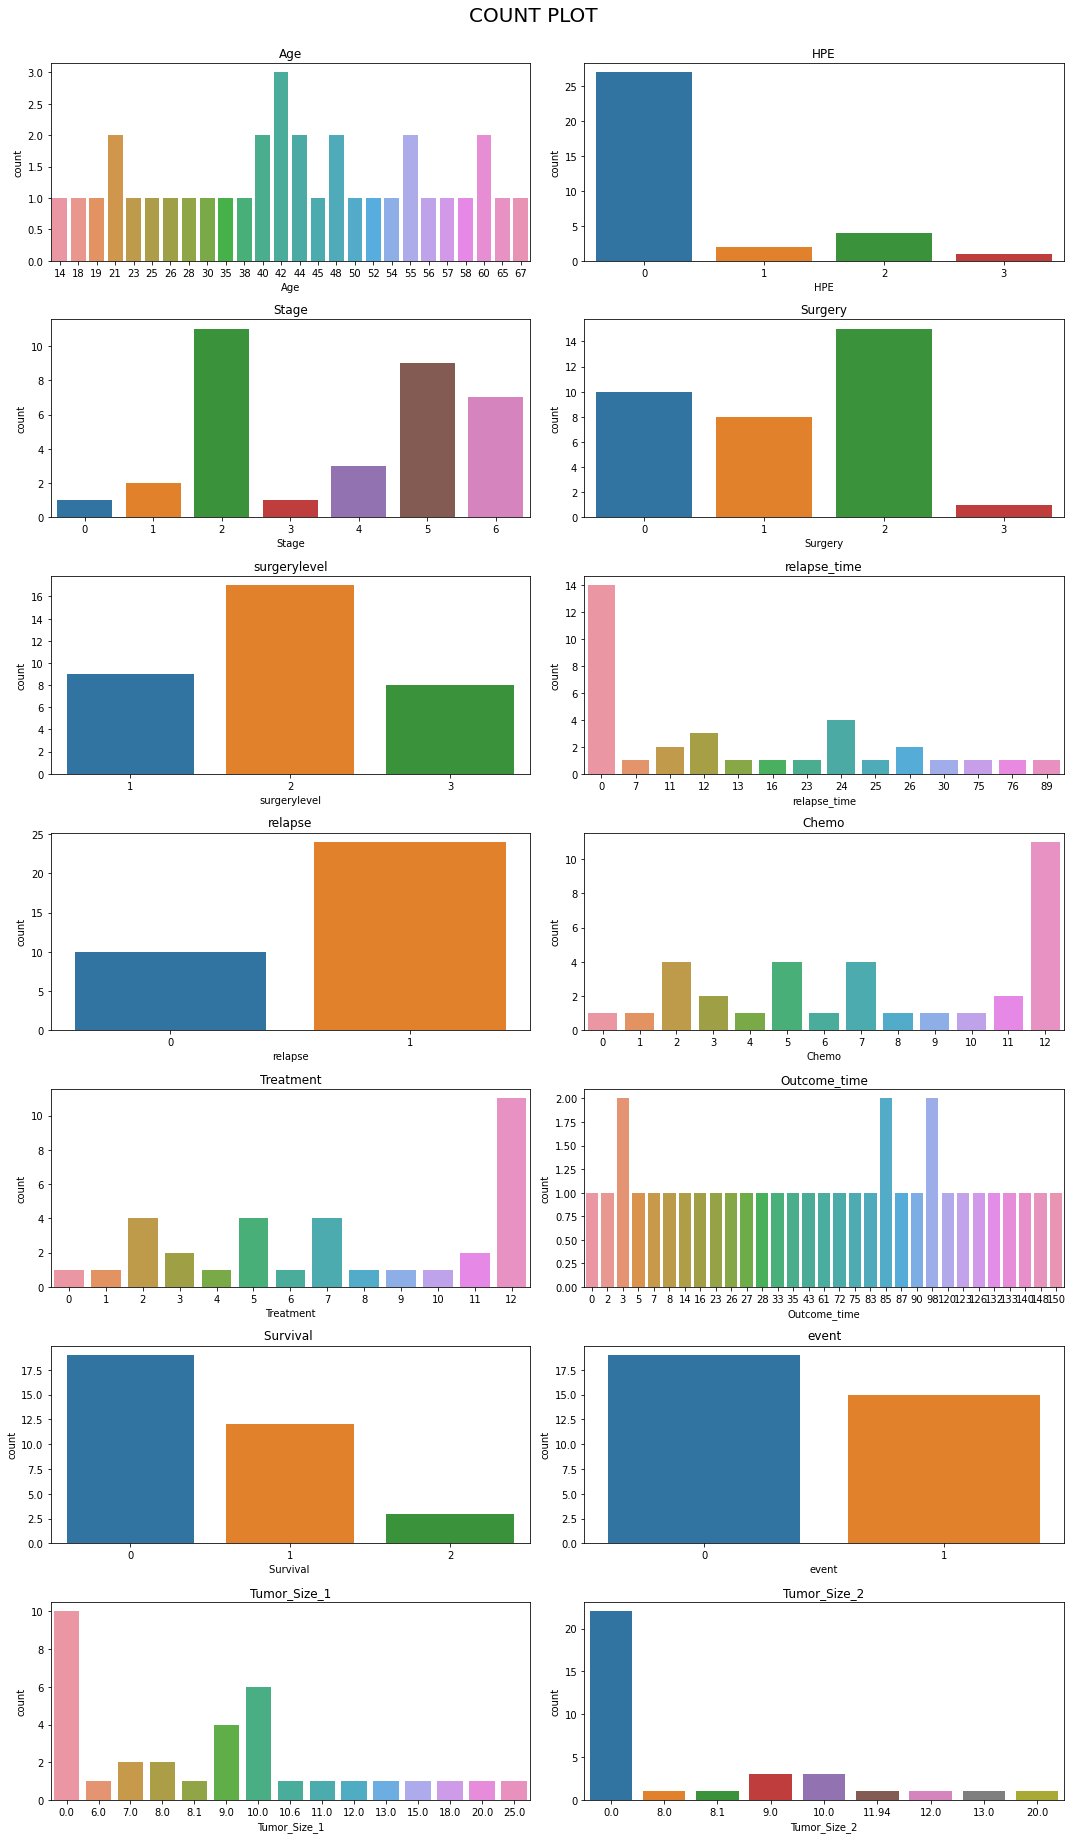

In [23]:
list1=list(df.columns)
plt.figure(figsize=(15,50))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 2, i+1)
    plt.suptitle("COUNT PLOT ", fontsize=20, x=0.5, y=1)
    sns.countplot(df[column])
    plt.title(f"{column}")
    plt.tight_layout()

<AxesSubplot:>

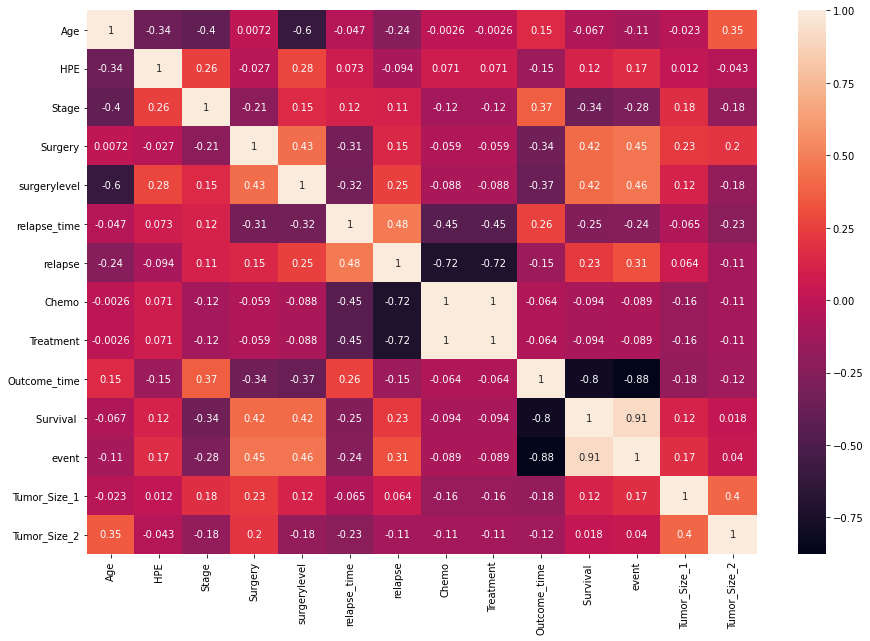

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

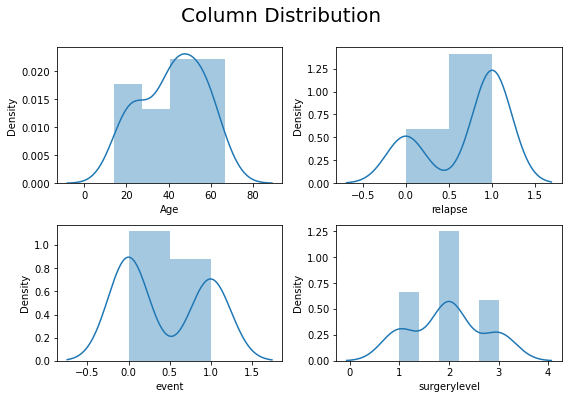

In [31]:
list1=['Age','relapse','event','surgerylevel']
plt.figure(figsize=(8,10))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 2, i+1)
    plt.suptitle("Column Distribution ", fontsize=20, x=0.5, y=1)
    sns.distplot(df[column])
    plt.tight_layout()

# FEATURE SELECTION

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
7,Chemo,inf
8,Treatment,inf
11,event,25.931752
4,surgerylevel,17.808801
9,Outcome_time,16.687198
0,Age,14.892112
6,relapse,13.730184
10,Survival,11.318158
2,Stage,9.732626
3,Surgery,4.755516


In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
olsmodel = smf.ols(formula='event~Age+relapse+surgerylevel',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  event   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     4.406
Date:                Sat, 27 Nov 2021   Prob (F-statistic):             0.0111
Time:                        16:48:17   Log-Likelihood:                -18.234
No. Observations:                  34   AIC:                             44.47
Df Residuals:                      30   BIC:                             50.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9557      0.496     -1.926      0.064      -1.969       0.058
Age              0.0100      0.006      1.539      0.134      -0.003       0.023
relapse          0.2633      0.172      1.529      0.137      -0.088       0.615
surgerylevel     0.4028      0.135      2.987      0.006       0.127       0.678
==============================================================================
Omnibus:                        2.667   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                1.878
Skew:                          -0.384   Prob(JB):                        0.391
Kurtosis:                       2.142   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
features = ['Age','relapse','event','surgerylevel']
for var in features:
    model = smf.ols(formula='event~{}'.format(var),data=df).fit()
    print('Price~{} {} {} {} '.format(var, '\np_value:' , model.pvalues[1], '\n'))

Price~Age 
p_value: 0.5488104993782548 
 
Price~relapse 
p_value: 0.07097131011525742 
 
Price~event 
p_value: 0.0 
 
Price~surgerylevel 
p_value: 0.006692329018594058 
 


In [35]:
df.columns

Index(['Age', 'HPE', 'Stage', 'Surgery', 'surgerylevel', 'relapse_time',
       'relapse', 'Chemo', 'Treatment', 'Outcome_time', 'Survival ', 'event',
       'Tumor_Size_1', 'Tumor_Size_2'],
      dtype='object')

In [42]:
df.rename(columns={ 'Survival ':'Survival'},inplace=True)

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
olsmodel = smf.ols(formula='event~Age+HPE+Stage+Surgery+surgerylevel+relapse_time+relapse+Chemo+Treatment+Outcome_time+Survival+Tumor_Size_1+Tumor_Size_2',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  event   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     23.64
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.67e-09
Time:                        16:57:32   Log-Likelihood:                 21.030
No. Observations:                  34   AIC:                            -16.06
Df Residuals:                      21   BIC:                             3.783
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0529      0.340     -0.155      0.878      -0.760       0.655
Age              0.0046      0.003      1.484      0.153      -0.002       0.011
HPE              0.0579      0.045      1.299      0.208      -0.035       0.151
Stage            0.0151      0.022      0.686      0.500      -0.031       0.061
Surgery          0.0344      0.041      0.838      0.411      -0.051       0.120
surgerylevel     0.0169      0.073      0.230      0.820      -0.136       0.170
relapse_time    -0.0018      0.002     -0.845      0.408      -0.006       0.003
relapse          0.2695      0.119      2.263      0.034       0.022       0.517
Chemo            0.0047      0.006      0.783      0.442      -0.008       0.017
Treatment        0.0047      0.006      0.783      0.442      -0.008       0.017
Outcome_time    -0.0043      0.001     -3.799      0.001      -0.007      -0.002
Survival         0.3647      0.085      4.310      0.000       0.189       0.541
Tumor_Size_1     0.0027      0.006      0.477      0.638      -0.009       0.014
Tumor_Size_2    -0.0053      0.007     -0.748      0.463      -0.020       0.009
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.175
Skew:                          -0.288   Prob(JB):                        0.556
Kurtosis:                       2.295   Cond. No.                     1.57e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
X = df.drop('event',axis=1)
y = df['event']
from sklearn.preprocessing import StandardScaler
SR=StandardScaler()
SR.fit_transform(X,y)

array([[ 1.58138588, -0.47500966,  0.70967742, -1.33941162, -1.37380798,
        -0.20018724,  0.64549722, -1.5994185 , -1.5994185 ,  1.73763402,
        -0.81150267,  0.03457391,  0.93990817],
       [ 0.42143532, -0.47500966,  1.25806452, -1.33941162, -1.37380798,
        -0.73753195, -1.54919334,  1.11959295,  1.11959295,  1.69718242,
        -0.81150267, -1.25365944, -0.69462184],
       [ 0.69436487, -0.47500966,  0.70967742,  0.88205155,  0.04163054,
         0.33715746,  0.64549722, -1.35223564, -1.35223564,  1.53537604,
        -0.81150267, -1.25365944, -0.69462184],
       [ 0.01204101, -0.47500966,  1.25806452,  0.88205155,  0.04163054,
        -0.24496597,  0.64549722, -0.11632135, -0.11632135,  1.39379545,
        -0.81150267,  2.77206977, -0.69462184],
       [-1.14790955, -0.47500966, -0.93548387,  0.88205155,  0.04163054,
         0.33715746,  0.64549722,  0.62522723,  0.62522723,  1.37356965,
        -0.81150267, -1.25365944, -0.69462184],
       [ 0.5579001 , -0.475009

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score

X = df.drop('event',axis=1)
y = df['event']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=31)

Logreg = RandomForestClassifier()
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
accuracy_score(y_test,y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)

print('Presicion Score is: ',precision_score(y_test,y_pred))
print('Recall score is:',recall_score(y_test,y_pred))
print('Accuaracy Score is:',lo(y_test,y_pred))

TP: 9 
TN: 0 
FP: 0 
FN: 5
Presicion Score is:  1.0
Recall score is: 1.0
Accuaracy Score is: 1.0
